<a href="https://colab.research.google.com/github/Masoomas98/DSPS_MSarfraz/blob/main/Homeworks/Homework7/Homework_7_clusteringGenes_instructionsDSPS2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=a13284b287c64e9b82171f3ad0bb8b73de1e045f88ae309b39fb0b65e5167124
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=497cf42109eff621fea72e05c2dce027294bb4d7f93f48c7bdbeb79248d02a55
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 23.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
import sklearn as skl
from sklearn import cluster
import umap
import umap.plot
from scipy.cluster.hierarchy import dendrogram, linkage

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# I  read the data
in https://github.com/fedhere/DSPS_FBianco/tree/master/HW7
its called kidpackgene.csv

In [3]:
#heatmap of genes

In [4]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv", sep = ',')

make sure you are not reading the index as a feature! you can control this with the index_col paramter of the function pd.read_csv or remove the column after you read the data in


make sure you show the data and look at it carefully

In [5]:
genes.shape

(4224, 75)

# II  Explore and preprocess the data  explore the data.


## II a
missing values? (remember you can use the missingno package and visualize the missing values!). What should you do with them?

In [6]:
genes.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [7]:
genes = genes.dropna().drop('Unnamed: 0', axis=1)

In [8]:
genes

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,-0.314408,0.131512,-0.049018,-0.674385,-0.289890,0.258422,-0.120400,-0.060359,0.706799,-0.326422,...,0.379001,0.009101,-0.182293,-0.270911,-0.434925,-0.031925,1.402160,0.502573,-0.061042,-0.206210
4220,-0.313823,-0.041095,-0.049798,-0.492502,-0.223146,0.172682,-0.164426,0.033539,0.420965,-0.180468,...,0.086748,0.198886,-0.167620,-0.336774,0.022460,-0.211773,0.379261,0.465487,0.024584,-0.264364
4221,-0.091283,0.118607,-0.088939,-0.349571,-0.107676,0.019609,0.187555,0.214635,0.210662,-0.127357,...,-0.121660,0.004138,-0.170726,-0.129437,-0.379607,0.007242,0.258818,0.284263,-0.008146,-0.047151
4222,-0.552395,0.125635,-0.290230,-1.283253,-0.870161,-0.131500,0.100046,0.153907,0.582813,-0.273445,...,0.219980,-0.503742,-0.727327,-0.477732,-0.523019,-0.382573,0.830773,0.246017,-0.002329,0.100187


74 patients with each 4224 genes

There are no missing values. We dont need to worry about it. because after dropping na values i have the same dataset with the same shape

## II b
whiten it, normalize it, scale it. What is appropriate? discuss your choices

In [9]:
from sklearn.preprocessing import normalize

In [52]:
from sklearn import preprocessing
#delete
genes = preprocessing.scale(genes, axis=0)

In [54]:
genes.mean(axis=0).round(2), genes.std(axis=0)


(array([ 0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
         0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
        -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0., -0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
         0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,
        -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

In [55]:
genes_norm = genes-genes.mean()/ genes.std()
genes_norm

array([[-0.10390895, -1.44631227,  0.54115292, ...,  1.13208158,
         0.49320283,  0.95276799],
       [-0.73943251,  0.53879462,  0.69516384, ...,  0.95494912,
        -0.6950822 ,  0.5877214 ],
       [ 0.01024745, -0.52957084, -0.45538124, ..., -0.40602471,
        -0.51034181, -0.08564642],
       ...,
       [ 0.00563416,  0.42958277, -0.26605602, ...,  0.58686221,
         0.25470697, -0.12942973],
       [-0.9117855 ,  0.45020596, -0.87974112, ...,  0.50842701,
         0.26562461,  0.29644913],
       [-1.61885048, -0.07257629, -0.65427304, ..., -0.36455808,
        -1.06687976, -0.55175871]])

# III Visualize the data


## III-a calculate and plot a t-SNE rojection of the data on an optimal 2D plane

In [13]:
skl.manifold.TSNE?


The hyperparameteres perplexity and possibly early_exaggeration may significantly impact the result. Find values that give you some structure in the data. Make sure you read the docstring and info on tSNE!

In [14]:
#delete
twodproj = skl.manifold.TSNE(n_components = 2).fit_transform(genes_norm)

In [15]:
twodproj.shape

(4224, 2)

plot the TSNE 2D projection


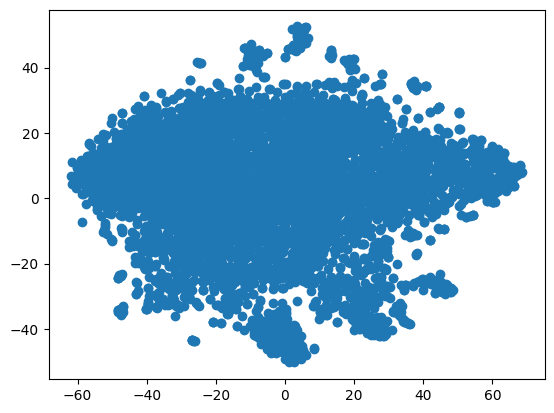

In [16]:
plt.scatter(twodproj[:,0], twodproj[:,1])

Figure 1: A TSNE plot which is a 2D projection of a 74 dimensional data. Seems like a big large cluster with some outliers. Clusters or groups of similar data points tend to be closer together in the lower-dimensional space. Which in this case seems like most of the genes of 74 patiensts are somehow correlated.

In [17]:
twodproj = skl.manifold.TSNE(n_components = 2, perplexity = 20).fit_transform(genes_norm) # default perplexity = 20, early exxageration = 12

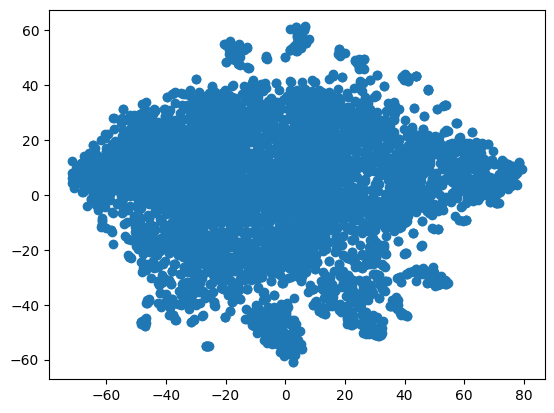

In [18]:
plt.scatter(twodproj[:,0], twodproj[:,1])

Figure 2: Same TSNE plot as above with perplexity = 20 , I didnt add other perplexities but there didnt seem a very obvious change other than the points seem to be clustered densly together for high perplexity. But nothing obvious.

## III-b calculate and plot the UMAP 2D projection

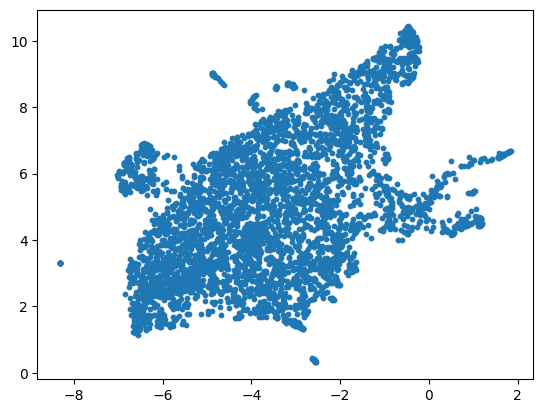

In [19]:
mapper = umap.UMAP(n_components=2).fit_transform(genes_norm)

# Scatter plot the 2D UMAP representation
plt.scatter(mapper[:, 0], mapper[:, 1], s=10)

Figure 3: A UMAP projection of the genes data. UMAP tends to preserve local and global structures after dimensionality reduction, here it seems like there is again a big cluster with a few outliers and some branches too.

/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

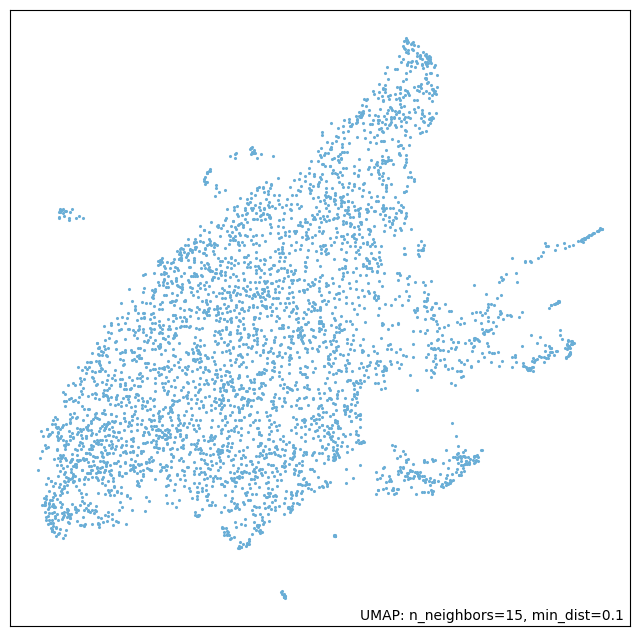

In [20]:
umap.plot.points(umap.UMAP(n_components=2).fit(genes_norm), labels=None)

Figure 4: Same UMAP with plot.points instead of scatter plot. Gives the same structure .

/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

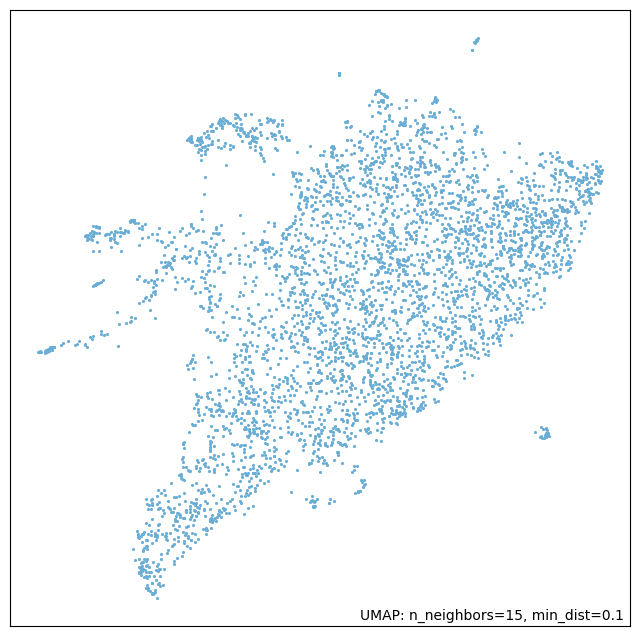

In [21]:
umap.plot.points(umap.UMAP(n_neighbors= 15).fit(genes_norm), labels=None)

Figure 5: Same UMAP again with n_neighbours 15, it's just flipped this time

# IV K-MEANS Clustering

## IV-a find the best number of culsters for this dataset

create a function that measures the intracluster variance

the intracluster variance is the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters

In [56]:

def calICVar(X, labels):
    """Calculates the intracluster variance of the k-MEANS algorithm.

    Parameters:
    - X: the input data (ndarray)
    - labels: the labels indicating the cluster of each datapoint; same number of data as X

    Returns:
    - icvar: intracluster variance
    """
    k = np.max(labels) + 1  # Number of clusters
    icvar = 0.0  # Initialize intracluster variance

    for j in range(k):
        cluster_points = X[labels == j]  # Data points in cluster j
        cluster_mean = np.mean(cluster_points, axis=0)  # Mean of cluster j

        # Calculate the sum of squared differences for each point in cluster j
        squared_diff = np.sum((cluster_points - cluster_mean) ** 2)

        # Add to the overall intracluster variance
        icvar += squared_diff

    return icvar
#It measures how tightly the data points are clustered within their assigned clusters.

In [57]:
from sklearn.cluster import KMeans
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  labels = kmeans.fit_predict(genes_norm)
  result = calICVar(genes_norm,labels)
  print(result)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


312576.0000000001


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


246707.89031235216


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


224492.77727679932


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


212931.19318638512


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


203156.61984606052


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


196133.6972004139


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


190780.6469466726


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


186489.2539219714


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


183030.1718022423


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


180030.3853357659


In [58]:
labels = kmeans.fit_predict(genes_norm)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 8, ..., 6, 7, 1], dtype=int32)

In [59]:
k = np.max(labels)+1
k

10

It seems like after cluster number 2 the variance doesn't decreases significantly so probably the cluster number 2 is optimal in our case. Let's visualize the elbow plot.

cluster the data with K-Means using 1 to 10 clusters. Calculate the intracluster variance and look for an "elbow" in the value of the intracluster variance as a function of number of clusters/ What is the optimal number of clusters?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

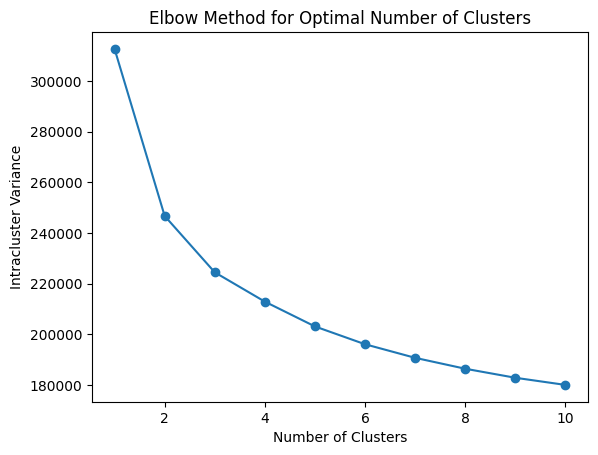

In [60]:
vars = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(genes_norm)
    icvar = calICVar(genes_norm, labels)
    vars.append(icvar)

# Plot the elbow graph
plt.plot(range(1, 11), vars, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Intracluster Variance')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


Figure 6: Elbow plot to find optimal number of clusters. I can see a sharp kink at around 2 so I would take 2 as my optimal number also computational cost increases with number of clusters so 2 seems reasonable.

In [61]:
vars

[312576.0000000001,
 246707.89031235216,
 224492.77727679932,
 212931.76976423484,
 203156.62201432328,
 196135.16825052022,
 190778.6738913739,
 186479.502057557,
 182920.15371087962,
 180103.45141165378]

The value of variance drops after 2 clusters and then decreases smoothly.

## IV-b Cluster the data with k-Means into the number of clusters as determined

1.   List item
2.   List item

from the elbow

In [62]:
optimal_clusters = 2
geneclustersKM = KMeans(n_clusters=optimal_clusters)
labels = geneclustersKM.fit_predict(genes_norm)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [63]:
np.unique(labels)

array([0, 1], dtype=int32)

## IV-c plot and plot the t-SNY and UMAP projections of the data using the cluster number as color

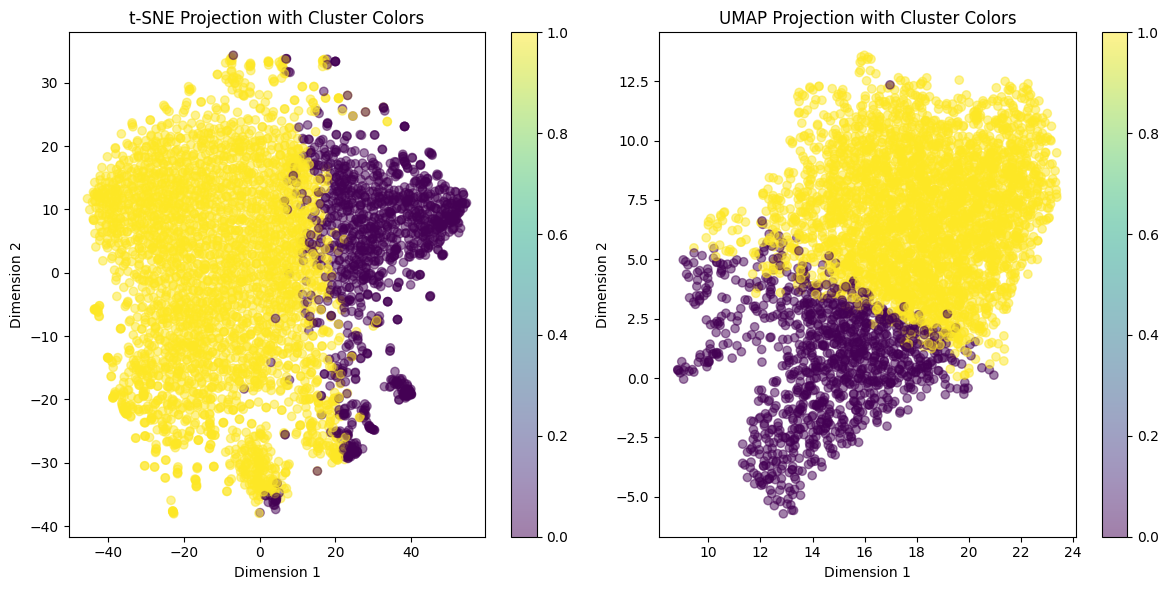

In [64]:
from sklearn.manifold import TSNE
import umap



# t-SNE
tsne = TSNE(n_components=2, perplexity = 50, early_exaggeration = 10 )
tsne_proj = tsne.fit_transform(genes_norm)

# UMAP
umap_proj = umap.UMAP(n_neighbors =  15, min_dist = 1, n_components= 2).fit_transform(genes_norm)

# Plot t-SNE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(tsne_proj[:, 0], tsne_proj[:, 1], c=labels, cmap='viridis', alpha = 0.5)
plt.title('t-SNE Projection with Cluster Colors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()

# Plot UMAP
plt.subplot(1, 2, 2)
#umap.plot.points(umap.UMAP(n_components=2).fit_transform(genes_norm), labels=None)
plt.scatter(umap_proj[:, 0], umap_proj[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('UMAP Projection with Cluster Colors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()

plt.tight_layout()
plt.show()


Figure 6 : Colour plots for TSNE and UMAP for cluster number 2. We can see all the genes are divided into 2 clusters using KMeans cluster method, however we can see that there are not two defined clusters and some genes are spread into other cluster, maybe  because the clustering method was not able to identify the genes correctly.

In [65]:
optimal_clusters = 3
geneclustersKM = KMeans(n_clusters=optimal_clusters)
labels = geneclustersKM.fit_predict(genes_norm)
np.unique(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 2], dtype=int32)

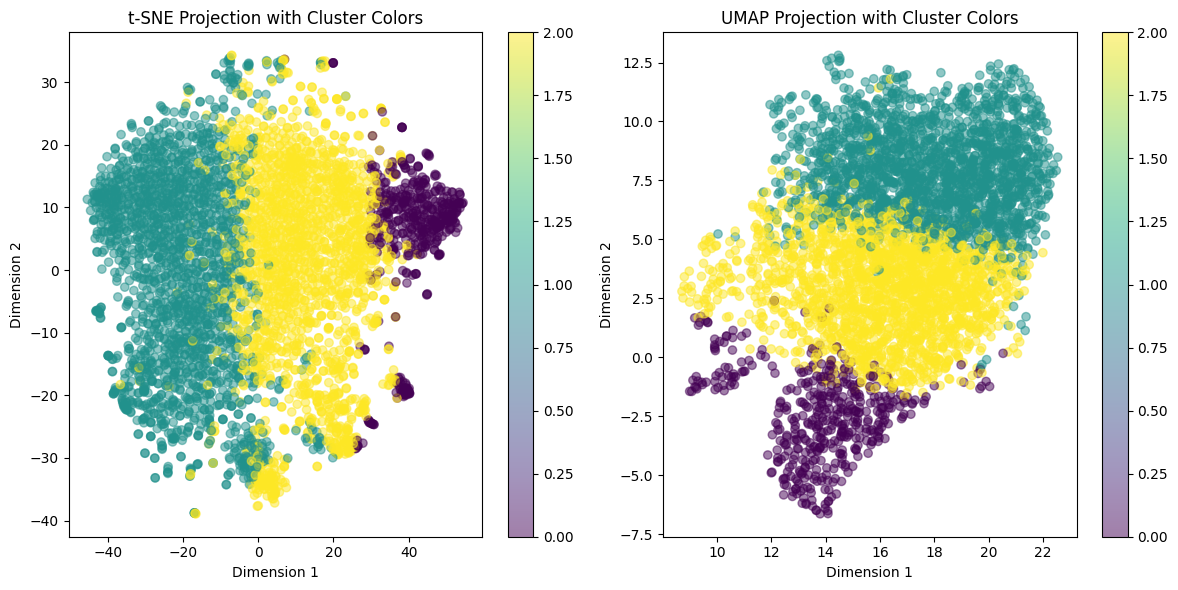

In [66]:
# t-SNE
tsne = TSNE(n_components=2, perplexity = 50, early_exaggeration = 10 )
tsne_proj = tsne.fit_transform(genes_norm)

# UMAP
umap_proj = umap.UMAP(n_neighbors =  15, min_dist = 1, n_components= 2).fit_transform(genes_norm)

# Plot t-SNE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(tsne_proj[:, 0], tsne_proj[:, 1], c=labels, cmap='viridis', alpha = 0.5)
plt.title('t-SNE Projection with Cluster Colors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()

# Plot UMAP
plt.subplot(1, 2, 2)
#umap.plot.points(umap.UMAP(n_components=2).fit_transform(genes_norm), labels=None)
plt.scatter(umap_proj[:, 0], umap_proj[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('UMAP Projection with Cluster Colors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()

plt.tight_layout()
plt.show()


Figure 8: I tried to see what it looked like for optimal cluster 3. The cluster seems to be divided into 3 sub clusters, where again we see some mixing up of genes of neighboring clusters into one another. I m not sure if the proportions they are divided into holds any significance for the TSNE and UMAP but the clusters green and yellow take most of the genes data.

# Use dDSCAN or hierarchical clustering (461 pick either DBSCAN or hierarchical) and redo the clustering. Can you find the same number of clusters?

# V DBSCAN Clustering


## V-a measure the distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. Initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, calculate and plot the Euclidean distance matrix of each point pairs if you have not yet

In [34]:
dists = sp.spatial.distance.pdist(genes_norm)
dists = sp.spatial.distance.squareform(sp.spatial.distance.pdist(genes_norm,metric='euclidean'))
dists

array([[0.        , 2.04710901, 2.89126968, ..., 4.22350792, 6.51952023,
        6.53913156],
       [2.04710901, 0.        , 3.04497804, ..., 4.31565592, 5.96023813,
        6.31637113],
       [2.89126968, 3.04497804, 0.        , ..., 4.0370855 , 6.26580602,
        5.77193565],
       ...,
       [4.22350792, 4.31565592, 4.0370855 , ..., 0.        , 4.43717   ,
        4.36677438],
       [6.51952023, 5.96023813, 6.26580602, ..., 4.43717   , 0.        ,
        4.24598645],
       [6.53913156, 6.31637113, 5.77193565, ..., 4.36677438, 4.24598645,
        0.        ]])

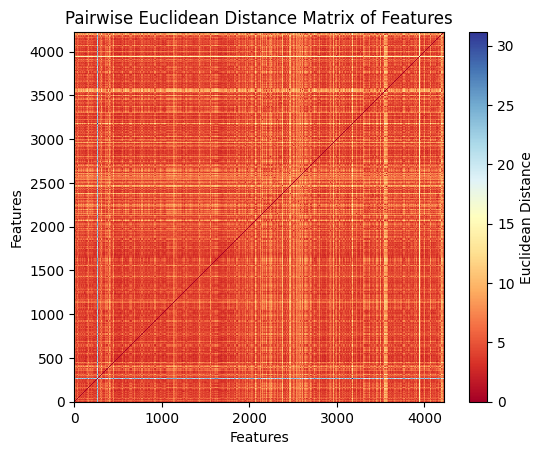

In [35]:
#plt.imshow(dists, cmap='plasma', origin='lower')
plt.imshow(dists, cmap='RdYlBu', origin='lower', interpolation='none')
plt.colorbar(label='Euclidean Distance')
plt.title('Pairwise Euclidean Distance Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()



Figure 9: Heatmap Matrix of the Euclidean Distance between the normalized genes dataset. The graph overall looks symmetrical which means the genes are closely related or distances are simialr between each point, apart from this there is a faint blue line which corresponds to outliers in the genes dataset

 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is below the mean

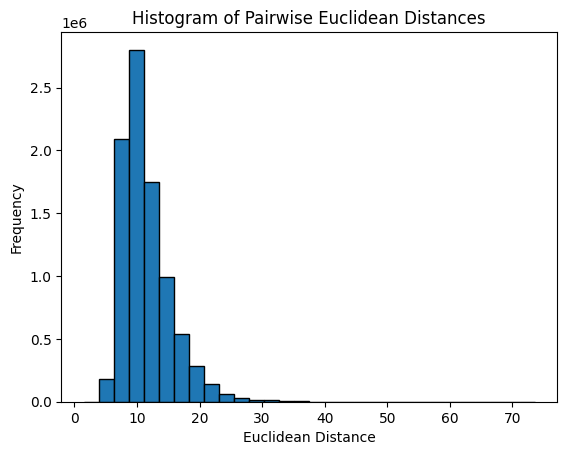

Initial value for eps: 11.470978212545768


In [67]:
dists = sp.spatial.distance.pdist(genes_norm,metric='euclidean')
plt.hist(dists, bins=30, edgecolor = 'black')
plt.title('Histogram of Pairwise Euclidean Distances')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.show()

#Choosing a value below the mean for initializing DBSCAN
eps_init = np.mean(dists)
print(f'Initial value for eps: {eps_init}')

Figure 10: A histogram depicting the distribution of Euclidean distances between the data points in genes dataset. Epsilon value is calculated taking mean of all the Euclidean Distances. Epsilon is a hyperparamter and DBSCAN is really sensitive to this hyperparamter , which is basically the distance from a c point from a dataset to another one and so one ... until there is no more is epsilon vicinity which will make a cluster.

## V-b Run DBSCAN

initialize the dbscan _eps_ hyperparameter value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. How many clusters do you have, how many outliers? is that a significant number?

In [78]:
geneclustersDBS = skl.cluster.DBSCAN(eps=11.47, min_samples=15).fit(genes_norm)

labels_db = geneclustersDBS.labels_
np.unique(geneclustersDBS.labels_)


array([-1,  0])

In [79]:
cluster_number = np.unique(geneclustersDBS.labels_[labels_db != -1])
outliers = geneclustersDBS.labels_[labels_db == -1]
print("The number of  outliers is =", len(outliers))
print("The number of  clusters is =", len(cluster_number))

The number of  outliers is = 16
The number of  clusters is = 1


## V-c plot the data in the t-SNE and UMAP projections color-coded by DBSCAN cluster

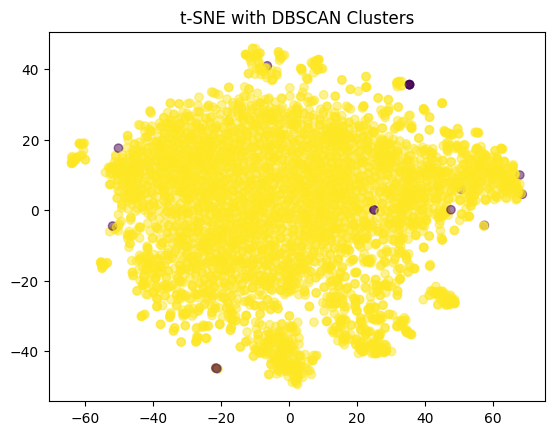

In [80]:
# Plot t-SNE with DBSCAN labels
tsne = TSNE(n_components=2)
tsne_proj = tsne.fit_transform(genes_norm)

plt.scatter(tsne_proj[:, 0], tsne_proj[:, 1], c=labels_db, cmap='viridis', alpha=0.5)
plt.title('t-SNE with DBSCAN Clusters')
plt.show()

Figure 11: As given by DBSCAN now there is only one cluster (yellow) with some outliers (purple) which are calculated above, I tried changing the min samples from 10-40 it kept giving me one cluster.

Text(0, 0.5, 'Dimension 2')

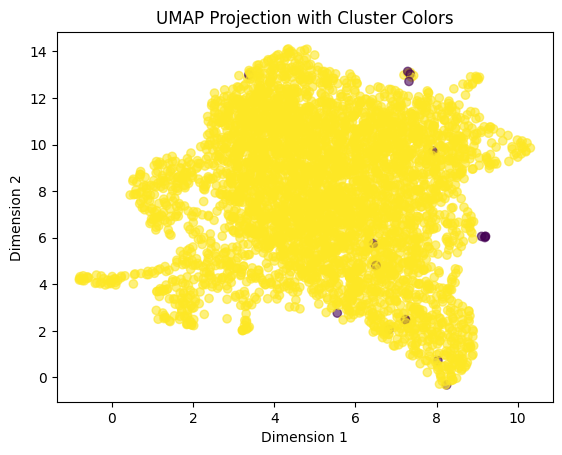

In [81]:
umap_proj = umap.UMAP(n_neighbors = 15, min_dist = 0.5, n_components= 2).fit_transform(genes_norm)
plt.scatter(umap_proj[:, 0], umap_proj[:, 1], c=labels_db, cmap='viridis', alpha=0.6)
plt.title('UMAP Projection with Cluster Colors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


Figure 12: UMAP for the DBSCAN , almost same result as TSNE plot with one big cluster and some outliers.

# VI Agglomerative clustering


## VI-a run agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

In [82]:
clusteringAg = skl.cluster.AgglomerativeClustering(affinity = 'euclidean').fit(genes_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


choose ward linkage and plot the dendrogram of the clusters

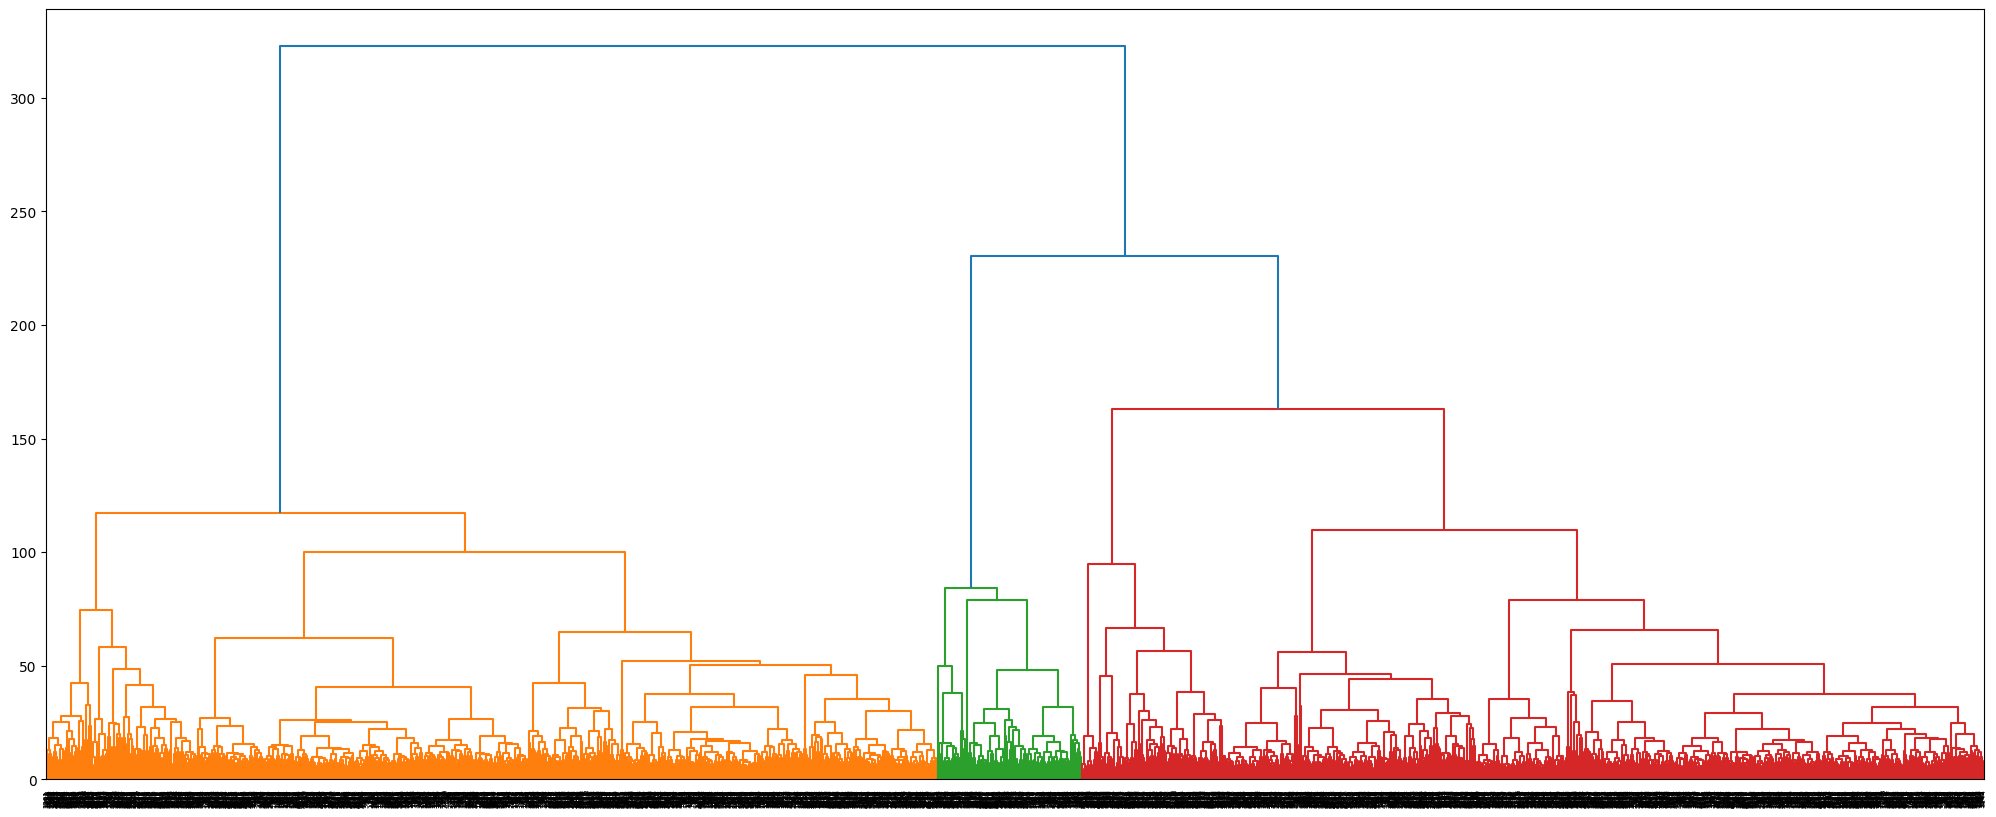

In [83]:
Z = linkage(genes_norm, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Figure 13 : A Dendrogram using Ward linkage. It shows how clusters are merged together as the algorithm proceeds. The height of the vertical lines represents the distance or dissimilarity at which clusters are merged. Longer lines indicate clusters that were merged at a greater distance or dissimilarity.
The horizontal axis represents the individual data points or clusters initially. As the algorithm proceeds, it shows how these points or clusters are grouped together based on their similarity or dissimilarity. In this dendogram we can see 3 clusters which eventually merge to a big clsuter at the end.

repeat with a different linkage and comment on differences

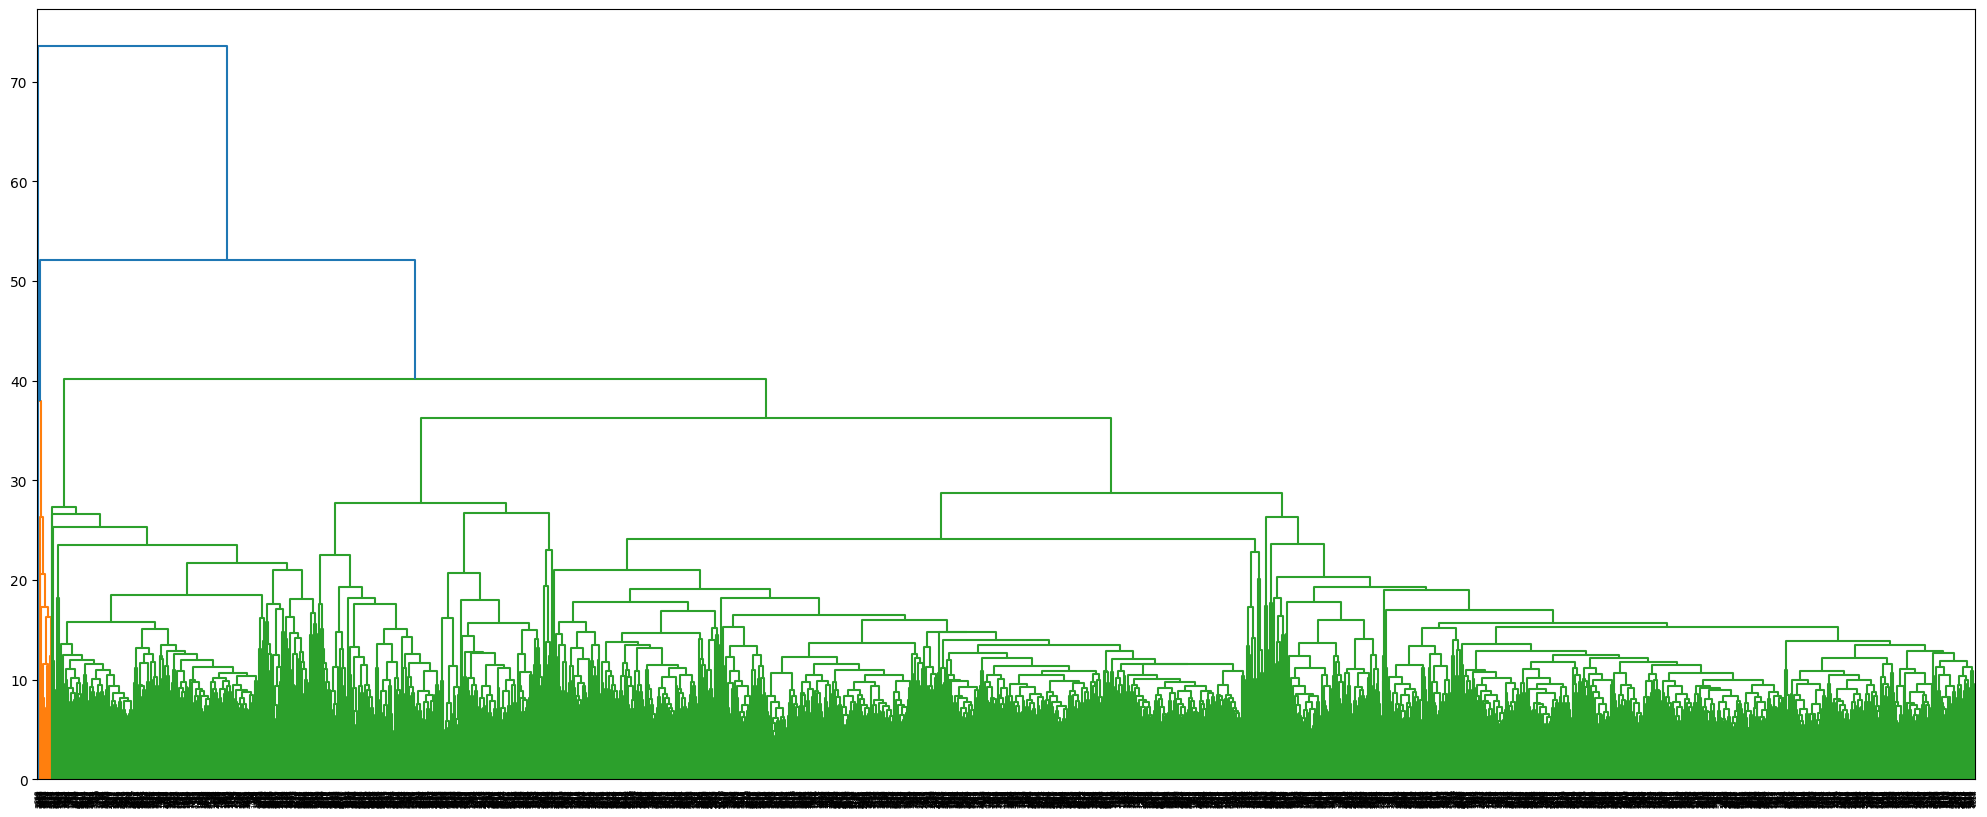

In [84]:
Z = linkage(genes_norm, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Figure 14: I chose complete for a second dendogram which is similar to ward linkage but the plot shows one big cluster and a very small one right next to it. It measures the distance between clusters by considering the maximum distance between any pair of points from different clusters. It uses the most dissimilar (maximum) pair of points from each cluster to compute the inter-cluster distance. When merging clusters, complete linkage compares the most dissimilar members of different clusters, ensuring that the clusters merged together have the maximum minimum distance between any pair of points from different clusters.
It tends to produce clusters of more equal diameter or width. In other words, it can be less sensitive to elongated or irregularly shaped clusters compared to other linkage methods.

# VI-b rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means.



In [98]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=2, affinity = 'euclidean').fit(genes_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [99]:
geneclustersAg.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [110]:
n_clusters = 2 # Replace this with your determined number of clusters

# Initialize and fit Agglomerative Clustering
agg_cluster = skl.cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # You can choose the linkage method
agg_labels = agg_cluster.fit_predict(genes_norm)
np.unique(agg_labels)

array([0, 1])

so Agglomerative clustering also gives 2 clusters.

## VI-c plot the 2D TSNE projection colorcoded as before

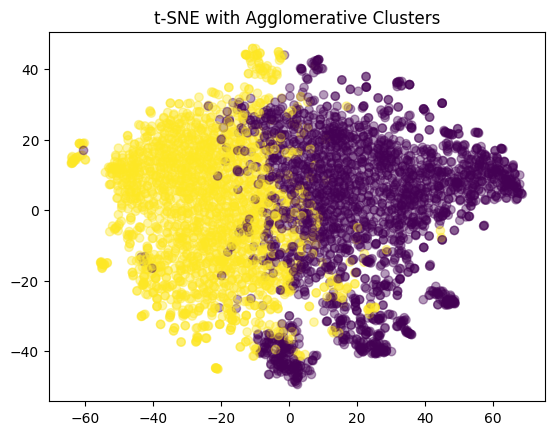

In [87]:
# Plot t-SNE with Agglomerative labels
plt.scatter(tsne_proj[:, 0], tsne_proj[:, 1], c=geneclustersAg.labels_, cmap='viridis', alpha=0.4)
plt.title('t-SNE with Agglomerative Clusters')
plt.show()

Figure 15 : As from kmeans and elbow plot we got 2 and i assumed 3 as optimal cluster number here is the plot of 2 clolours for TSNE plot, if i compare this kmeans i can clearly see the second (purple) cluster is more spread out and proportion of both clusters are 50-50.

In [90]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=3, affinity = 'euclidean').fit(genes_norm)
geneclustersAg.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 1, 0, 0])

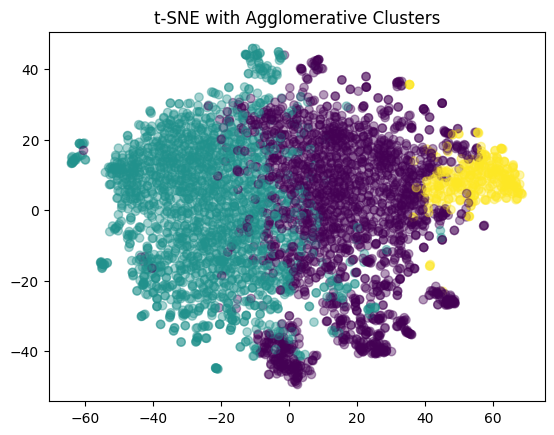

In [91]:
# Plot t-SNE with Agglomerative labels
plt.scatter(tsne_proj[:, 0], tsne_proj[:, 1], c=geneclustersAg.labels_, cmap='viridis', alpha=0.4)
plt.title('t-SNE with Agglomerative Clusters')
plt.show()

Figure 16: Just tried with cluster number 3 and cluster distribution looks similar to what we got from KMEANS.

# VII Comment, in the spirit of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526, which was the most "useful" method for clustering


I think for any dataset Agglomerative Hierarchical Clustering is the most useful one especially in our case because the dendograms visualization can actually show how the clusters are being formed. It shows a hierachy from onw data point until it converges to form a one big cluster. More attention and analysis can lead to one choosing the right number of clusters or where we have to stop.
For DBSCAN it's sensitive to hyperparameters like min_samples and epsilon and I palyed with the values but without complete detailed knowledge of the nature of dataset that could lead to entirely wrong results as well.
For kmeans, we need to choose the number of clusters ourselves so data used for KMEANS clustering must be well-defined and structured. I guess :)  